In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#/content/sample_data/Company_Data.csv

In [4]:
company= pd.read_csv('/content/sample_data/Company_Data.csv')

In [5]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
company['Sales'].count()

400

In [13]:
sales_mean=company['Sales'].mean()

In [14]:
company.loc[company["Sales"]>=sales_mean,"Sales_Credit"]="Good"
company.loc[company["Sales"]<=sales_mean,"Sales_Credit"]="Bad"

In [15]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Credit
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad


In [16]:
company.drop(["Sales"],axis=1,inplace=True)

In [17]:
le=preprocessing.LabelEncoder()
for column_name in company.columns:
    if company[column_name].dtype == object:
        company[column_name] = le.fit_transform(company[column_name])
    else:
        pass

In [19]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Credit
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [21]:
features = company.iloc[:,0:10]
labels = company.iloc[:,-1]

In [22]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
features_std=stdscaler.fit_transform(features)

In [24]:
colnames = list(company.columns)
predictors = colnames[0:10]
target = colnames[-1]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(features_std,labels,test_size = 0.2,random_state=10)

## **Building Decision Tree Classifier using Entropy Criteria**

In [83]:
model = DecisionTreeClassifier(max_depth=6,criterion = "entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

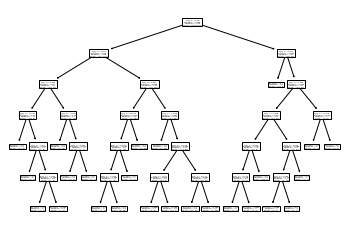

In [85]:
tree.plot_tree(model);

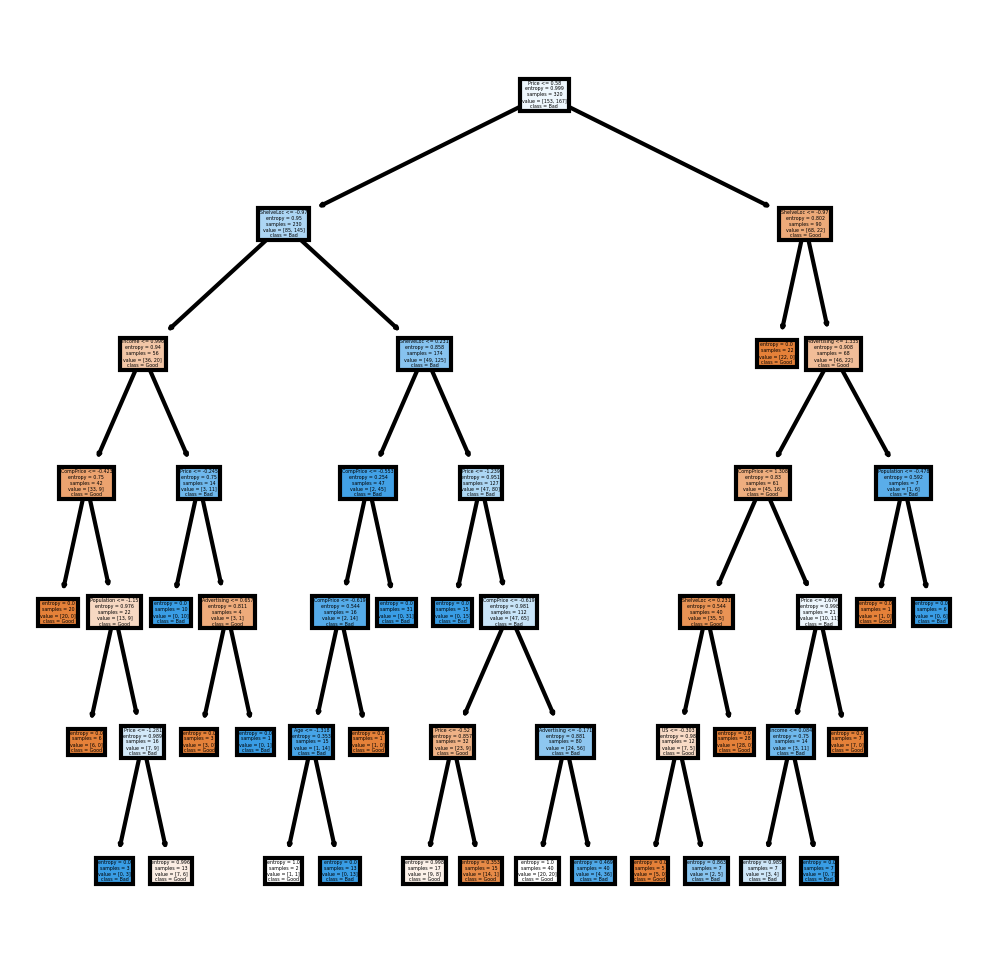

In [86]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = predictors, 
               class_names=['Good','Bad'],
               filled = True);

In [87]:
model.n_classes_

2

In [88]:
model.score(x_test,y_test)

0.7375

In [90]:
prediction = model.predict(x_train)

In [91]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.859375

In [92]:
np.mean(prediction == y_train)

0.859375

In [93]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[144,   9],
       [ 36, 131]])

In [94]:
pred_test = model.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.7375

In [96]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        48
           1       0.70      0.59      0.64        32

    accuracy                           0.74        80
   macro avg       0.73      0.71      0.72        80
weighted avg       0.73      0.74      0.73        80



# **Building Decision Tree Classifier using Gini Impurity Criteria**

In [116]:
model_gini = DecisionTreeClassifier(max_depth=6,criterion="gini")
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
model_gini.n_classes_

2

In [117]:
model_gini.score(x_test,y_test)

0.725

In [119]:
prediction_gini = model_gini.predict(x_train)

In [120]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction_gini)
accuracy

0.9125

In [121]:
pred_test = model_gini.predict(x_test)

In [122]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.725

In [123]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.64      0.72      0.68        32

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80

